In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
credit_card_dataset = pd.read_csv('creditcard.csv')

In [6]:
credit_card_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
credit_card_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
credit_card_dataset.shape

(284807, 31)

In [9]:
credit_card_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_card_dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_card_dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
print((credit_card_dataset.groupby('Class')['Class'].count()/credit_card_dataset['Class'].count())*100)


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

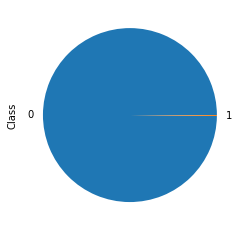

In [13]:
((credit_card_dataset.groupby('Class')['Class'].count()/credit_card_dataset['Class'].count())*100).plot.pie()

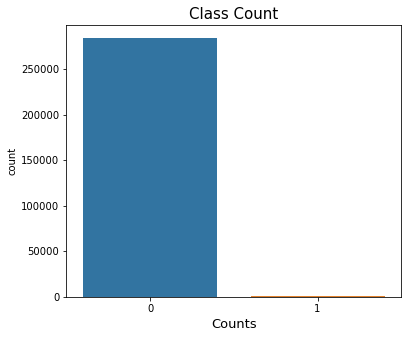

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(credit_card_dataset['Class'])
plt.title("Class Count",fontsize=15)
plt.xlabel("Records Counts by Class",fontsize=13)
plt.xlabel("Counts",fontsize=13)
plt.show()

In [15]:
correlation = credit_card_dataset.corr()
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<AxesSubplot:>

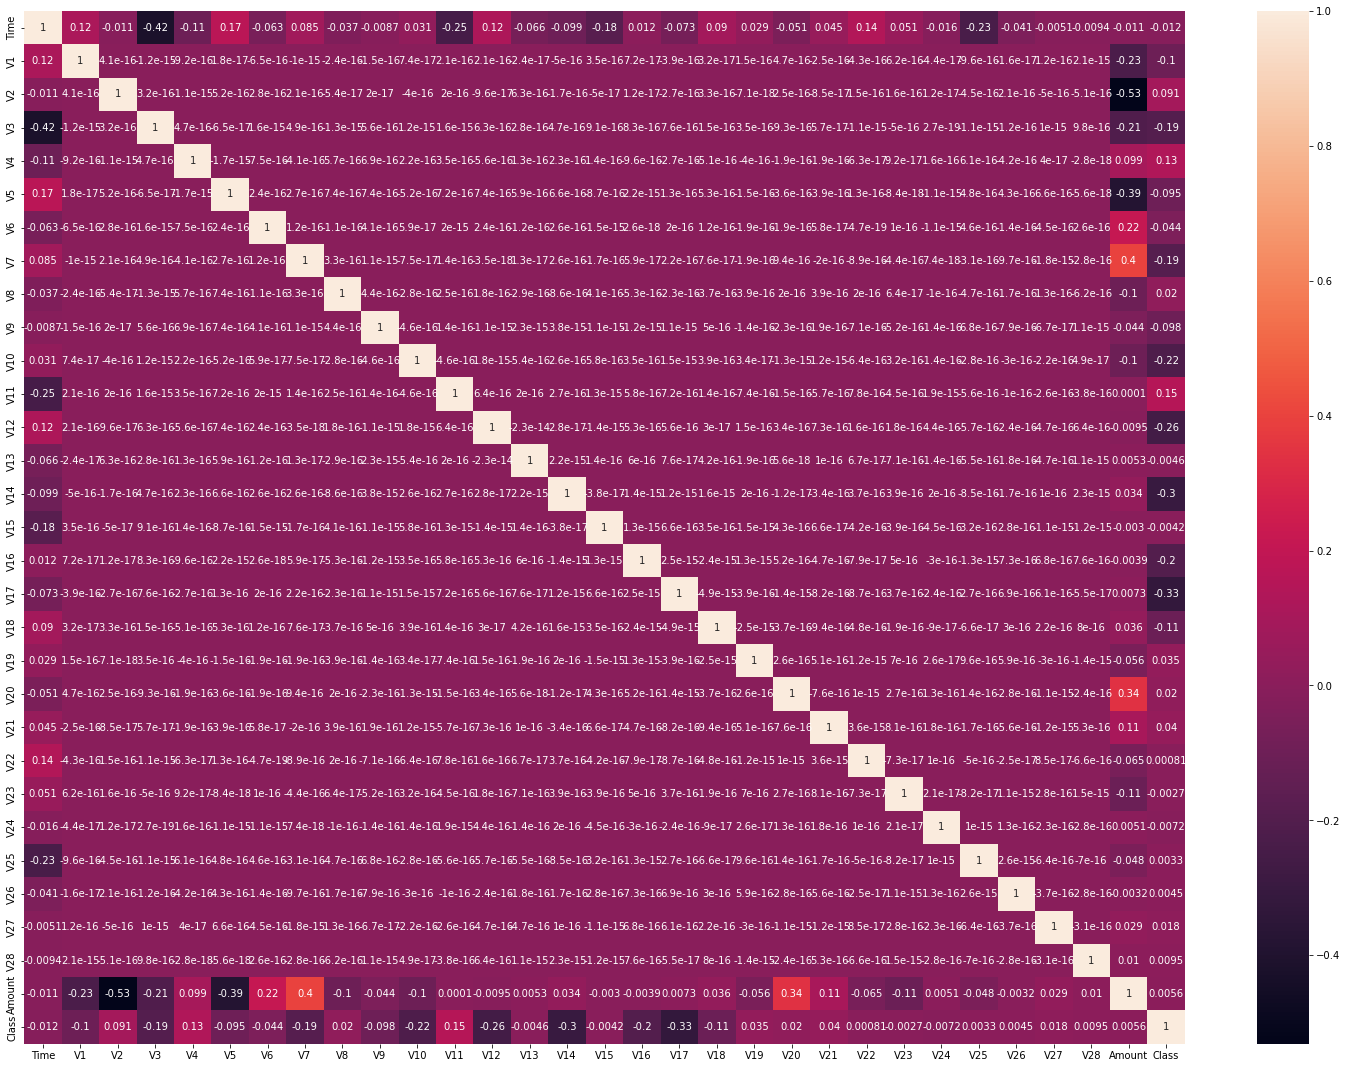

In [16]:
plt.figure(figsize = (26,19))
sns.heatmap(correlation,annot = True)

In [17]:
normal = credit_card_dataset[credit_card_dataset.Class == 0]
fraud = credit_card_dataset[credit_card_dataset.Class == 1]

In [18]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [19]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
credit_card_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
normal_sample = normal.sample(n=492)

In [24]:
normal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220796,142305.0,-1.680003,1.981157,-1.500533,-0.862412,-0.406252,-0.615603,0.350655,0.814838,0.462686,...,-0.255855,-0.377274,0.196372,-0.398758,-0.384900,0.194699,0.584418,0.265819,56.43,0
133517,80422.0,-1.897474,1.633495,0.168163,-1.350804,-1.187028,-0.535407,-0.861658,1.634682,-0.053653,...,0.021304,-0.232053,0.192702,0.006499,-0.233772,0.756833,0.013098,-0.015552,0.92,0
59586,48908.0,1.422356,-0.199401,0.030939,-0.651592,-0.602845,-0.883254,-0.428792,-0.229455,-0.927465,...,-0.165735,-0.544542,0.039263,-0.192571,0.332597,-0.452407,0.027235,0.041728,15.00,0
134734,80937.0,-1.253923,-0.429945,0.641862,0.277510,0.525183,-1.064488,-0.604047,0.497625,-0.731987,...,0.260038,0.191103,0.057505,0.091796,-1.032989,0.919701,0.026604,-0.086973,10.00,0
283067,171353.0,2.033215,0.281797,-1.724732,0.550658,0.263690,-1.515972,0.375738,-0.466968,0.408561,...,0.211270,0.816778,-0.045674,0.006245,0.287107,-0.109165,0.004220,-0.024128,15.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66299,51978.0,-6.734608,4.462938,-1.127153,-0.855077,-1.424101,1.631547,-4.568045,-11.540860,1.099068,...,11.851446,-4.219673,2.454604,0.224967,0.317706,0.431003,0.778540,-0.186506,1.00,0
126486,78017.0,-0.813507,-0.007249,2.182309,-1.882778,-0.357984,-0.682075,-0.100226,0.265030,1.133546,...,0.137907,0.400839,-0.207794,0.317255,0.068021,-0.860263,0.142843,0.115386,1.00,0
42906,41291.0,-1.579921,-2.012014,1.421111,-2.986842,-0.500186,-0.206431,0.979772,-0.816209,0.621739,...,-0.554764,0.068239,-0.487611,0.090820,-0.497575,-0.284704,-0.134583,-0.688196,340.53,0
212631,138934.0,0.016133,0.831794,0.154214,-0.806182,0.736297,-0.468989,0.936670,-0.044105,-0.370397,...,-0.220582,-0.459694,0.014114,-0.456868,-0.459663,0.148590,0.248946,0.084136,5.99,0


In [38]:
new_data = pd.concat([normal_sample,fraud],axis = 0)
shuffled_data = new_data.sample(frac=1, random_state=42)
shuffled_data.reset_index(drop=True, inplace=True)

In [39]:
shuffled_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00,1
1,55507.0,1.384960,-1.383779,0.263675,-1.707714,-1.086659,0.671890,-1.380765,0.201792,-1.789905,...,-0.023163,0.225980,-0.178274,-1.153193,0.373148,-0.024654,0.052558,0.011756,69.00,0
2,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,1
3,28676.0,1.178200,0.248156,0.381575,1.061892,-0.388335,-0.777133,0.070666,-0.054465,-0.169134,...,0.085889,0.208229,-0.080303,0.526109,0.601407,-0.356242,0.004096,0.011263,8.65,0
4,168093.0,-4.108706,-1.542943,0.733371,0.851435,0.826087,-1.661933,-1.745012,0.635692,0.298262,...,-0.327775,-0.708770,-2.126581,0.156888,-0.263371,-0.354085,0.267263,-1.137899,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,147579.0,1.922033,-1.099660,-0.844575,-0.461784,-0.453975,0.638528,-0.865310,0.238965,-0.104191,...,-0.259713,-0.123354,0.355896,-1.045992,-0.635644,0.653977,0.010522,-0.056796,51.73,0
980,157558.0,2.053354,-0.032293,-1.058627,0.405470,-0.078908,-1.120040,0.195970,-0.330651,0.482821,...,-0.278933,-0.644646,0.342245,-0.002876,-0.300743,0.199777,-0.065127,-0.059654,1.98,0
981,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90,1
982,53854.0,0.021542,-0.434113,0.936114,-2.127448,-1.515113,-0.314627,-0.850463,-1.800245,-2.090696,...,1.378054,-0.575596,-0.170167,0.387997,0.544099,-0.302081,0.294175,0.217466,116.00,0


In [40]:
shuffled_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [41]:
shuffled_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97658.550813,0.085798,-0.055868,-0.131862,-0.033265,0.002184,-0.046622,-0.046700,-0.130047,-0.128084,...,0.025702,0.016564,-0.023926,-0.021812,0.020082,0.010648,0.004893,-0.018339,-0.004145,99.797398
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [42]:
X = shuffled_data.drop(columns = ['Class'],axis=1)
y = shuffled_data['Class']

In [43]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00
1,55507.0,1.384960,-1.383779,0.263675,-1.707714,-1.086659,0.671890,-1.380765,0.201792,-1.789905,...,-0.185371,-0.023163,0.225980,-0.178274,-1.153193,0.373148,-0.024654,0.052558,0.011756,69.00
2,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90
3,28676.0,1.178200,0.248156,0.381575,1.061892,-0.388335,-0.777133,0.070666,-0.054465,-0.169134,...,-0.182550,0.085889,0.208229,-0.080303,0.526109,0.601407,-0.356242,0.004096,0.011263,8.65
4,168093.0,-4.108706,-1.542943,0.733371,0.851435,0.826087,-1.661933,-1.745012,0.635692,0.298262,...,-1.264944,-0.327775,-0.708770,-2.126581,0.156888,-0.263371,-0.354085,0.267263,-1.137899,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,147579.0,1.922033,-1.099660,-0.844575,-0.461784,-0.453975,0.638528,-0.865310,0.238965,-0.104191,...,-0.651648,-0.259713,-0.123354,0.355896,-1.045992,-0.635644,0.653977,0.010522,-0.056796,51.73
980,157558.0,2.053354,-0.032293,-1.058627,0.405470,-0.078908,-1.120040,0.195970,-0.330651,0.482821,...,-0.206118,-0.278933,-0.644646,0.342245,-0.002876,-0.300743,0.199777,-0.065127,-0.059654,1.98
981,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.445573,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90
982,53854.0,0.021542,-0.434113,0.936114,-2.127448,-1.515113,-0.314627,-0.850463,-1.800245,-2.090696,...,-0.720577,1.378054,-0.575596,-0.170167,0.387997,0.544099,-0.302081,0.294175,0.217466,116.00


In [44]:
y

0      1
1      0
2      1
3      0
4      0
      ..
979    0
980    0
981    1
982    0
983    0
Name: Class, Length: 984, dtype: int64

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 22)
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (787, 30)
Shape of y_train =  (787,)
Shape of X_test =  (197, 30)
Shape of y_test =  (197,)


In [261]:
model = LogisticRegression()

In [262]:
model.fit(X_train,y_train)

LogisticRegression()

In [263]:
X_train_pred = model.predict(X_train)

In [264]:
X_train_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [272]:
trained_data_accuracy = accuracy_score(y_train,X_train_pred)
print('Accuracy of trained data = ', trained_data_accuracy*100 )

Accuracy of trained data =  90.97839898348158


In [273]:
X_test_pred = model.predict(X_test)

In [274]:
X_test_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [276]:
tested_data_accuracy = accuracy_score(y_test,X_test_pred)
print('Accuracy of tested data = ', tested_data_accuracy*100 )

Accuracy of tested data =  93.90862944162437


In [277]:
from sklearn.metrics import confusion_matrix

In [278]:
cf_matrix = confusion_matrix(y_test,X_test_pred)
cf_matrix

array([[92,  3],
       [ 9, 93]], dtype=int64)

In [279]:
tn,fp,fn,tp = cf_matrix.ravel()
print(tn,fp,fn,tp)

92 3 9 93


<AxesSubplot:>

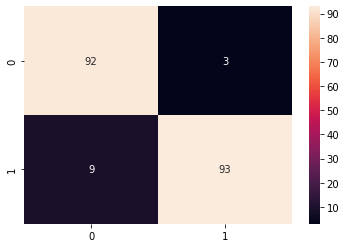

In [280]:
sns.heatmap(cf_matrix,annot = True)